In [4]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Point

In [6]:
# load regularly spaced site list
grid_list = pd.read_csv('SiteList-BayArea-2km.txt', sep=' ')
grid_list = gpd.GeoDataFrame(grid_list, crs='epsg:4326', geometry=[Point(x, y) for (x, y) in zip(grid_list.lon, grid_list.lat)])
grid_list.head()

,lat,lon,geometry
0,36.9038,-123.6138,POINT (-123.61380 36.90380)
1,36.9219,-123.6138,POINT (-123.61380 36.92190)
2,36.9399,-123.6138,POINT (-123.61380 36.93990)
3,36.9579,-123.6138,POINT (-123.61380 36.95790)
4,36.9759,-123.6138,POINT (-123.61380 36.97590)


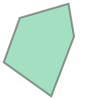

In [13]:
# load site boundary
site_boundary = pd.read_csv('site_boundary_test.csv')
site_boundary = gpd.GeoDataFrame(site_boundary, crs='epsg:4326', geometry=site_boundary['WKT'].map(loads))
site_boundary = site_boundary['geometry'].iloc[0]
site_boundary

In [14]:
grid_list['keep'] = grid_list['geometry'].intersects(site_boundary)
print(grid_list.groupby('keep').size())
new_site_list = grid_list.loc[grid_list['keep']==True]
display(new_site_list.head())
new_site_list[['lat', 'lon']].to_csv('new_site_list_test.txt', sep=' ', index=False, header=False)

keep
False    11379
True        70
dtype: int64


,lat,lon,geometry,keep
6997,37.6599,-122.1318,POINT (-122.13180 37.65990),True
6998,37.6779,-122.1318,POINT (-122.13180 37.67790),True
6999,37.6959,-122.1318,POINT (-122.13180 37.69590),True
7000,37.7139,-122.1318,POINT (-122.13180 37.71390),True
7103,37.6419,-122.1090,POINT (-122.10900 37.64190),True
